In [50]:
import torch
from ultralytics import YOLO

In [51]:
model = YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:16<00:00, 5.45MB/s]



image 1/1 /Users/igor/Desktop/Petnica/PSI_Fire_Detection/notebooks/../data/D-Fire/train/images/AoF01917.jpg: 384x640 (no detections), 264.3ms
Speed: 2.8ms preprocess, 264.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /Users/igor/Desktop/Petnica/PSI_Fire_Detection/notebooks/../data/D-Fire/train/images/WEB04346.jpg: 448x640 (no detections), 275.7ms
Speed: 0.9ms preprocess, 275.7ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /Users/igor/Desktop/Petnica/PSI_Fire_Detection/notebooks/../data/D-Fire/train/images/WEB03429.jpg: 352x640 (no detections), 207.1ms
Speed: 0.9ms preprocess, 207.1ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /Users/igor/Desktop/Petnica/PSI_Fire_Detection/notebooks/../data/D-Fire/train/images/WEB02737.jpg: 512x640 3 cars, 3 motorcycles, 308.0ms
Speed: 1.0ms preprocess, 308.0ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /Users/igor/Desktop

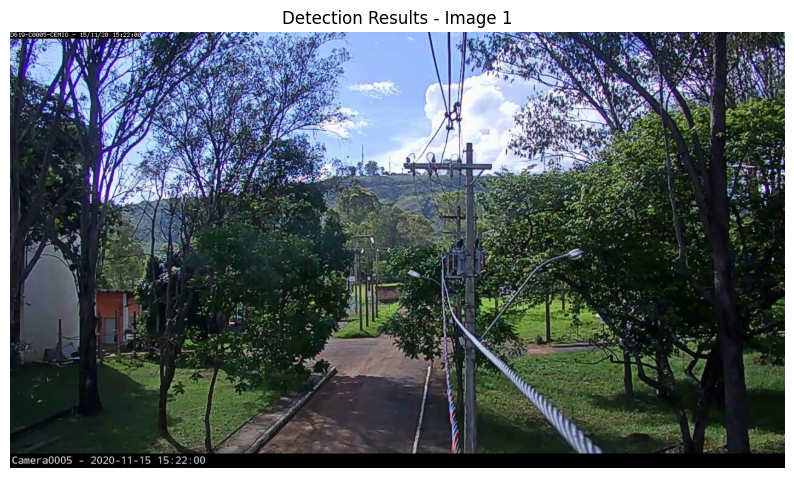

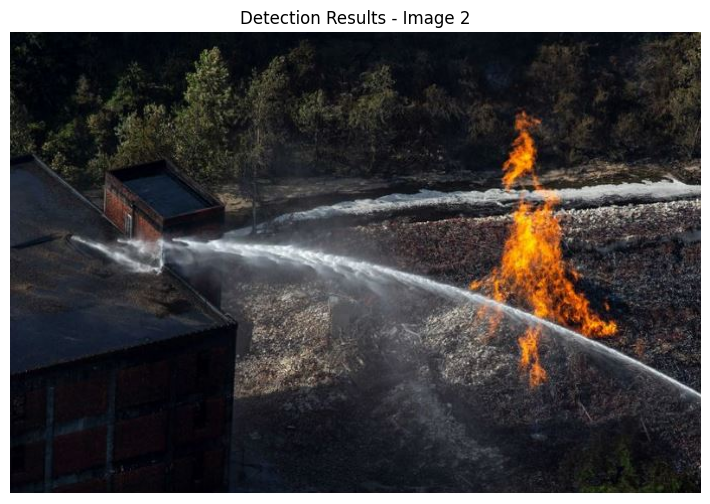

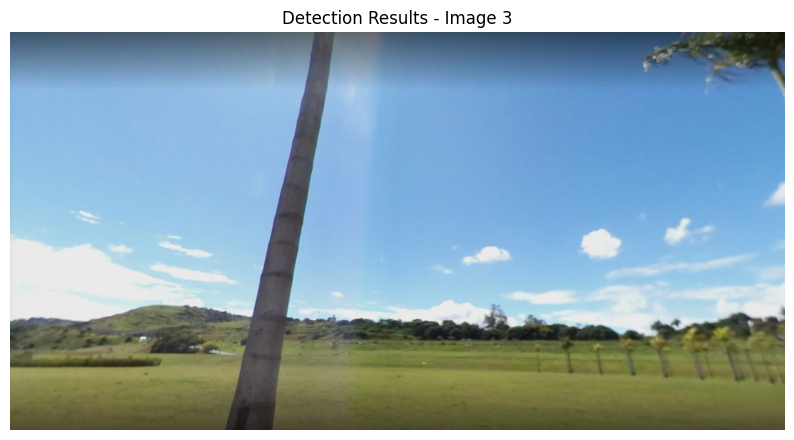

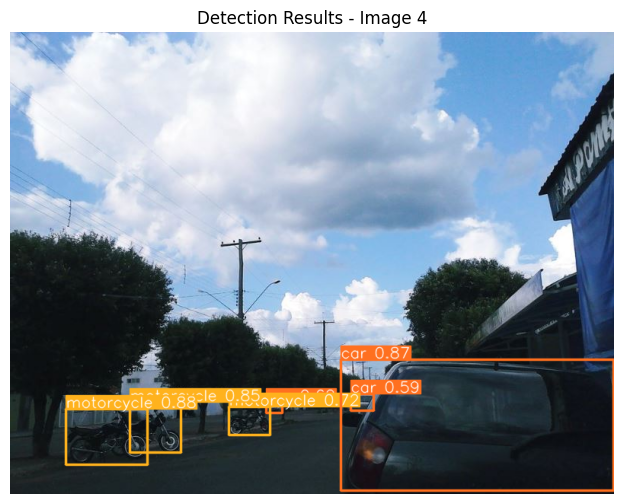

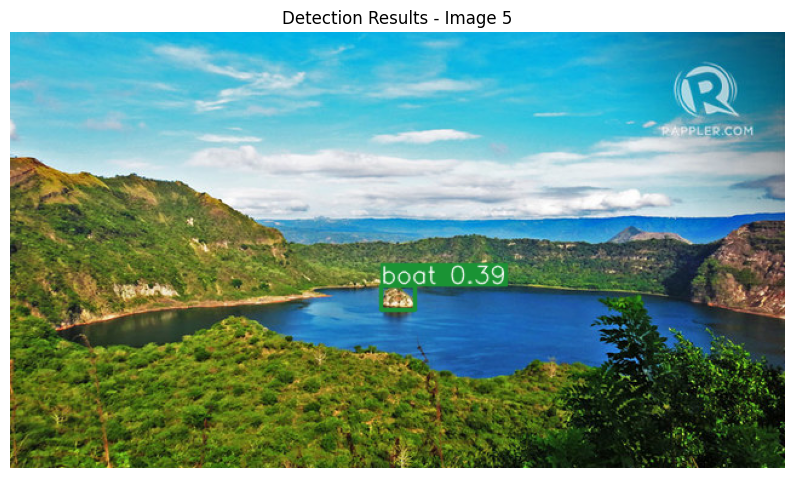

In [55]:
import os
from glob import glob
from PIL import Image

# Get a list of image file paths
image_folder = '../data/D-Fire/train/images'
image_paths = glob(os.path.join(image_folder, '*.jpg'))[:5]  # Load first 5 images

import cv2

# Run YOLOv8 inference on each image
results = []
for img_path in image_paths:
    results.append(model(img_path))  # This runs detection and stores results

import matplotlib.pyplot as plt
for i, result in enumerate(results):
    # result.plot() returns a numpy array (RGB image with bounding boxes)
    im_array = cv2.cvtColor(result[0].plot(), cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(im_array)
    plt.axis('off')
    plt.title(f"Detection Results - Image {i+1}")
    plt.show()

In [43]:
import os
import random
import shutil

train_images_folder = "../data/D-Fire/train/images"
train_labels_folder = "../data/D-Fire/train/labels"
val_images_folder = "../data/D-Fire/val/images"
val_labels_folder = "../data/D-Fire/val/labels"

# Create the validation folders if they don't exist
os.makedirs(val_images_folder, exist_ok=True)
os.makedirs(val_labels_folder, exist_ok=True)

# Get the list of image files in the train set
image_files = os.listdir(train_images_folder)

# Calculate the number of images to move to the validation set
num_val_images = int(0.1 * len(image_files))

# Randomly select the images to move
val_image_files = random.sample(image_files, num_val_images)

# Move the selected images and their corresponding labels to the validation set
for image_file in val_image_files:
   # Move image file
   image_src = os.path.join(train_images_folder, image_file)
   image_dst = os.path.join(val_images_folder, image_file)
   shutil.move(image_src, image_dst)

   # Move label file
   label_file = image_file.replace(".jpg", ".txt")
   label_src = os.path.join(train_labels_folder, label_file)
   label_dst = os.path.join(val_labels_folder, label_file)
   shutil.move(label_src, label_dst)

In [ ]:
# This part of the code takes too long on a cpu

PROJECT = 'psi-fire-detection'  # project name
NAME = 'd-fire-yolo'  # run name

model.train(
   data = '../data/D-Fire/data.yaml',
   task = 'detect',
   epochs = 200,
   verbose = True,
   batch = 64,
   imgsz = 640,
   patience = 20,
   save = True,
   workers = 8,
   project = PROJECT,
   name = NAME,
   cos_lr = True,
   lr0 = 0.0001,
   lrf = 0.00001,
   warmup_epochs = 3,
   warmup_bias_lr = 0.000001,
   optimizer = 'Adam',
   seed = 42,
)

New https://pypi.org/project/ultralytics/8.3.174 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.136 🚀 Python-3.10.18 torch-2.2.2 CPU (Apple M3)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../data/D-Fire/data.yaml, epochs=200, patience=20, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=psi-fire-detection, name=d-fire-yolo, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, r

KeyboardInterrupt: 